C:\Users\benle\AppData\Local\Temp\ipykernel_17624\268968391.py:44: DtypeWarning: Columns (18,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('books_corrected.csv')
C:\Users\benle\AppData\Local\Temp\ipykernel_17624\268968391.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['top_genre'] = df_cleaned['genre_and_votes'].apply(get_top_genre)


<Figure size 1200x800 with 0 Axes>

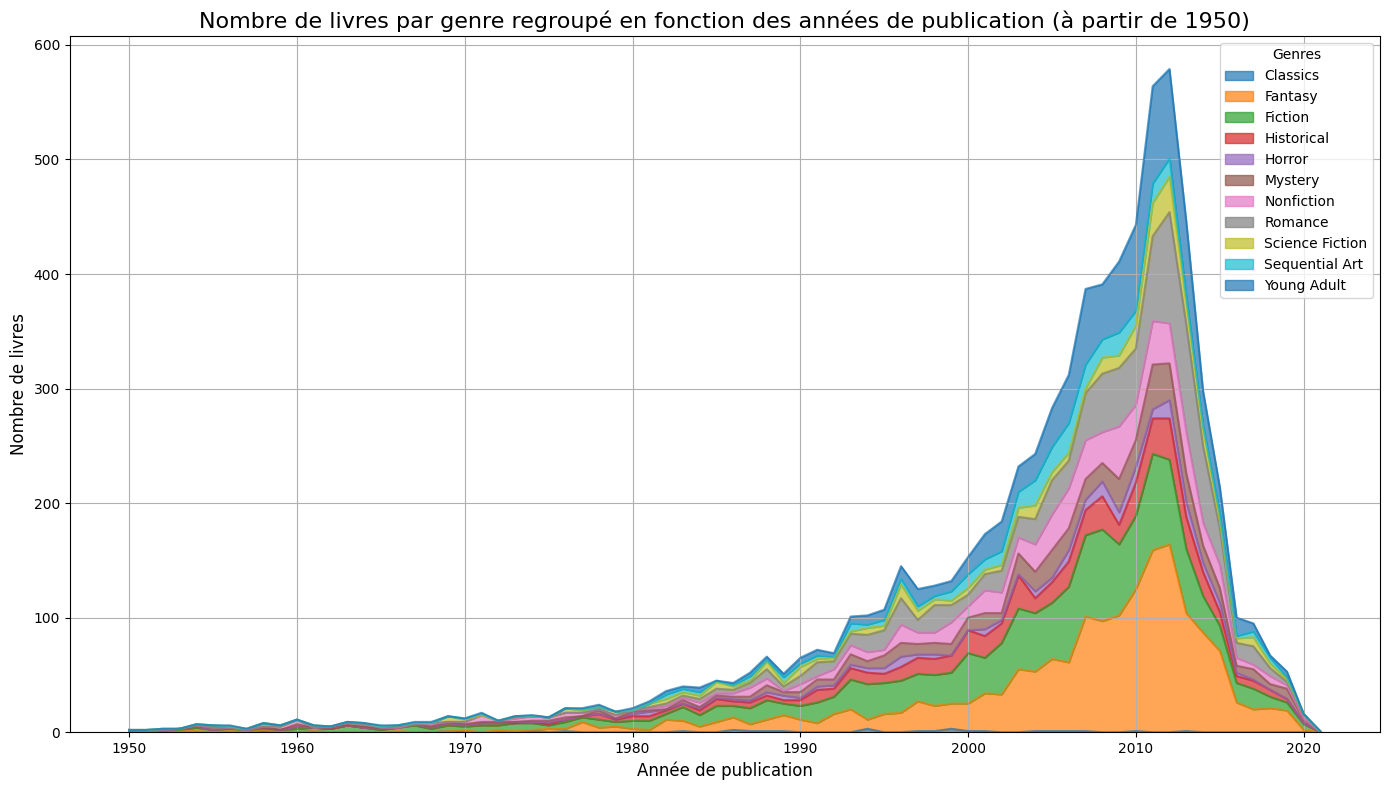

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Fonction pour extraire le genre avec le plus de votes
def get_top_genre(genre_and_votes):
    if pd.isna(genre_and_votes):
        return None
    # Séparer les paires "genre nombre_de_votes"
    genre_votes = re.findall(r'(\D+)\s(\d+)', genre_and_votes)
    if not genre_votes:
        return None
    # Trouver le genre avec le plus de votes
    top_genre = max(genre_votes, key=lambda x: int(x[1]))[0].strip()
    return top_genre

# Fonction pour regrouper les genres similaires
def group_genres(genre):
    genre = genre.lower()
    if 'fantasy' in genre:
        return 'Fantasy'
    elif 'classics' in genre:
        return 'Classics'
    elif 'young adult' in genre:
        return 'Young Adult'
    elif 'sequential art' in genre:
        return 'Sequential Art'
    elif 'science fiction' in genre:
        return 'Science Fiction'
    elif 'romance' in genre:
        return 'Romance'
    elif 'nonfiction' in genre:
        return 'Nonfiction'
    elif 'mystery' in genre:
        return 'Mystery'
    elif 'horror' in genre:
        return 'Horror'
    elif 'historical' in genre:
        return 'Historical'
    elif 'fiction' in genre:
        return 'Fiction'

# Lire le fichier CSV nettoyé
df = pd.read_csv('books_corrected.csv')

# Extraire l'année de publication
df['date_published'] = pd.to_datetime(df['date_published'], errors='coerce').dt.year

# Supprimer les lignes avec des années de publication manquantes
df_cleaned = df.dropna(subset=['date_published', 'genre_and_votes'])

# Appliquer la fonction pour extraire le genre dominant
df_cleaned['top_genre'] = df_cleaned['genre_and_votes'].apply(get_top_genre)

# Supprimer les lignes où le genre dominant n'a pas pu être déterminé
df_cleaned = df_cleaned.dropna(subset=['top_genre'])

# Regrouper les genres similaires
df_cleaned['grouped_genre'] = df_cleaned['top_genre'].apply(group_genres)

# Filtrer les dates à partir de 1950
df_cleaned = df_cleaned[df_cleaned['date_published'] >= 1950]

# Agréger les données par année et genre regroupé
df_genre_year = df_cleaned.groupby(['date_published', 'grouped_genre']).size().reset_index(name='book_count')

# Pivot pour préparer les données à tracer
df_pivot = df_genre_year.pivot(index='date_published', columns='grouped_genre', values='book_count').fillna(0)

# Tracer un graphique en aires
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='area', stacked=True, figsize=(14, 8), alpha=0.7)

# Ajouter les étiquettes et le titre
plt.title('Nombre de livres par genre regroupé en fonction des années de publication (à partir de 1950)', fontsize=16)
plt.xlabel('Année de publication', fontsize=12)
plt.ylabel('Nombre de livres', fontsize=12)

# Afficher la légende et le graphique
plt.legend(title='Genres')
plt.grid(True)
plt.tight_layout()
plt.show()